In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [108]:
img_1 = cv2.imread('dali.jpg')
img_1

array([[[40, 37, 59],
        [30, 28, 48],
        [46, 41, 62],
        ...,
        [14, 13, 23],
        [14, 13, 23],
        [13, 12, 22]],

       [[32, 32, 50],
        [45, 44, 60],
        [33, 32, 48],
        ...,
        [15, 14, 24],
        [15, 14, 24],
        [14, 13, 23]],

       [[30, 33, 48],
        [31, 31, 47],
        [32, 31, 47],
        ...,
        [15, 14, 24],
        [14, 13, 23],
        [14, 13, 23]],

       ...,

       [[ 5,  4,  6],
        [ 5,  4,  6],
        [ 5,  4,  6],
        ...,
        [ 9,  9, 79],
        [ 9,  9, 79],
        [ 9,  9, 79]],

       [[ 5,  4,  6],
        [ 5,  4,  6],
        [ 5,  4,  6],
        ...,
        [ 8,  8, 78],
        [ 8,  8, 78],
        [ 8,  8, 78]],

       [[ 5,  4,  6],
        [ 5,  4,  6],
        [ 5,  4,  6],
        ...,
        [ 8,  8, 78],
        [ 8,  8, 78],
        [ 8,  8, 78]]], dtype=uint8)

In [109]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_1

array([[[59, 37, 40],
        [48, 28, 30],
        [62, 41, 46],
        ...,
        [23, 13, 14],
        [23, 13, 14],
        [22, 12, 13]],

       [[50, 32, 32],
        [60, 44, 45],
        [48, 32, 33],
        ...,
        [24, 14, 15],
        [24, 14, 15],
        [23, 13, 14]],

       [[48, 33, 30],
        [47, 31, 31],
        [47, 31, 32],
        ...,
        [24, 14, 15],
        [23, 13, 14],
        [23, 13, 14]],

       ...,

       [[ 6,  4,  5],
        [ 6,  4,  5],
        [ 6,  4,  5],
        ...,
        [79,  9,  9],
        [79,  9,  9],
        [79,  9,  9]],

       [[ 6,  4,  5],
        [ 6,  4,  5],
        [ 6,  4,  5],
        ...,
        [78,  8,  8],
        [78,  8,  8],
        [78,  8,  8]],

       [[ 6,  4,  5],
        [ 6,  4,  5],
        [ 6,  4,  5],
        ...,
        [78,  8,  8],
        [78,  8,  8],
        [78,  8,  8]]], dtype=uint8)

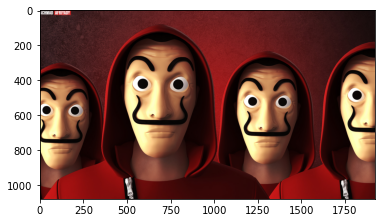

In [110]:
plt.imshow(img_1)

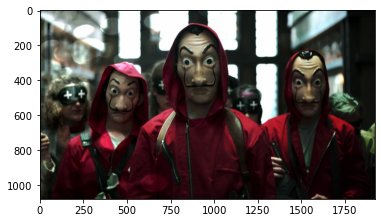

In [112]:
img_2 = cv2.imread('bella_ciao.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

In [113]:
large_img = img_1
small_img = img_2

In [114]:
print('Large Image Shape :',large_img.shape)
print('Small Image Shape :',small_img.shape)

Large Image Shape : (1080, 1920, 3)
Small Image Shape : (1080, 1920, 3)


In [115]:
x_start = large_img.shape[1] - small_img.shape[1]
y_start = large_img.shape[0] - small_img.shape[0]

x_end = x_start + small_img.shape[1]
y_end = y_start + small_img.shape[0]

(1080, 1920, 3)


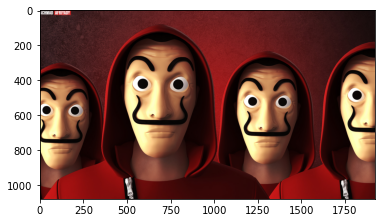

In [116]:
roi = img_1[y_start:y_end, x_start:x_end]
plt.imshow(roi)
print(roi.shape)

## Making MAP

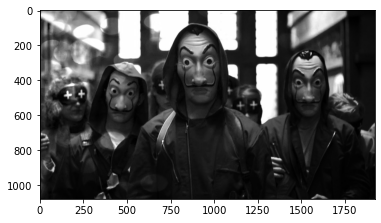

In [117]:
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
plt.imshow(img_2_gray, cmap = 'gray')

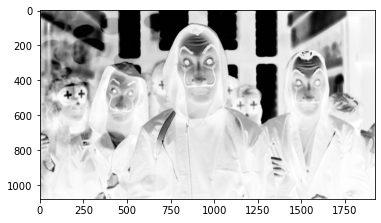

In [118]:
# inverse the color
mask_inv = cv2.bitwise_not(img_2_gray)
plt.imshow(mask_inv, cmap = 'gray')

In [119]:
mask_inv.shape

(1080, 1920)

# Step 2. Make the map with three dimension

(1080, 1920, 3)


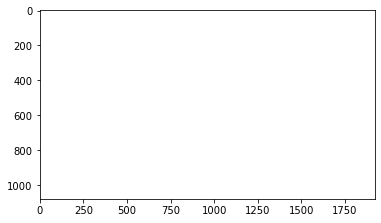

In [120]:
white_img = np.full(img_2.shape, fill_value=255, dtype = np.uint8)
print(white_img.shape)
plt.imshow(white_img)

## Step 3. Map the image on the white image

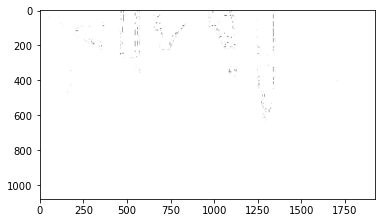

In [121]:
bk = cv2.bitwise_or(white_img, white_img, mask = mask_inv)
plt.imshow(bk)

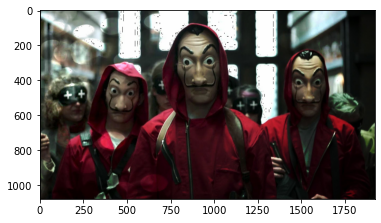

In [122]:
# Map the image on the img_2 
fg = cv2.bitwise_or(img_2, img_2, mask = mask_inv)
plt.imshow(fg)

## Step 4. Blend the two image

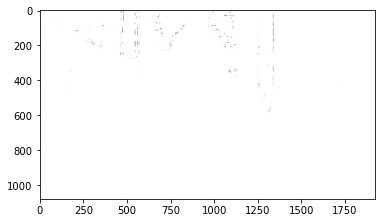

In [123]:
roi_bk = cv2.bitwise_or(roi, bk)
plt.imshow(roi_bk)

(1080, 1920, 3)


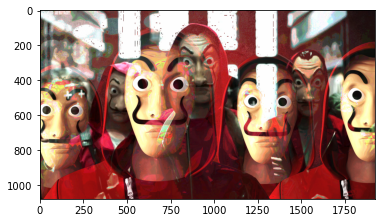

In [128]:
roi_fg = cv2.bitwise_or(roi, fg)
plt.imshow(roi_fg)
print(roi_fg.shape)

In [125]:
# cv2.imwrite('la_casa_de_papel.jpg',roi_fg)


True

## Step 5. Attach the piece into the original image

In [126]:
large_img = img_1
small_img = roi_fg

x_start = large_img.shape[1] - small_img.shape[1]
y_start = large_img.shape[0] - small_img.shape[0]

x_end = x_start + small_img.shape[1]
y_end = y_start + small_img.shape[0]

large_img[y_start:y_end, x_start:x_end] = small_img

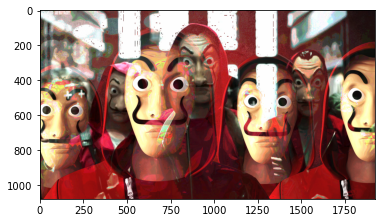

In [127]:
plt.imshow(large_img)

# Thresholding

In [147]:
nwt_img = cv2.imread('network.jpg')

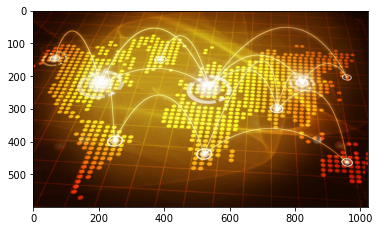

In [148]:
plt.imshow(nwt_img)

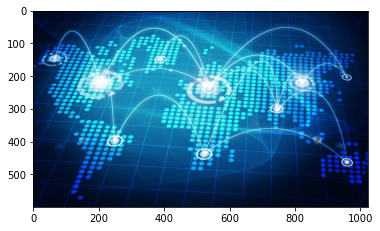

In [149]:
nwt_img_1 = cv2.cvtColor(nwt_img, cv2.COLOR_BGR2RGB)
plt.imshow(nwt_img_1)

### Read the image in BW

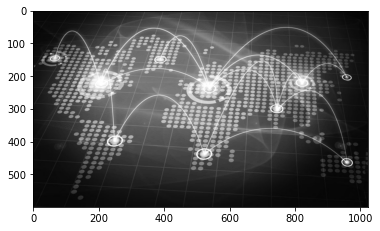

In [150]:
# Adding the 0 flag to read it in black and white
nwt_img = cv2.imread('network.jpg',0)
plt.imshow(nwt_img,cmap='gray')

### Binary Threshold

In [142]:
ret,thresh1 = cv2.threshold(nwt_img,127,255,cv2.THRESH_BINARY)

In [143]:
ret

127.0

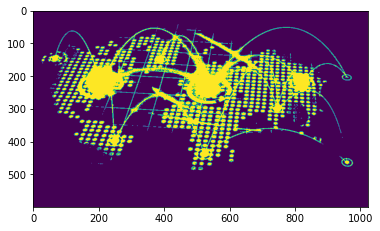

In [151]:
plt.imshow(thresh1)

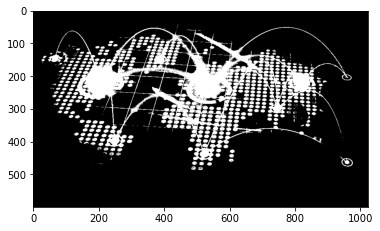

In [153]:
plt.imshow(thresh1,cmap='gray')

### Binary Inverse

127.0


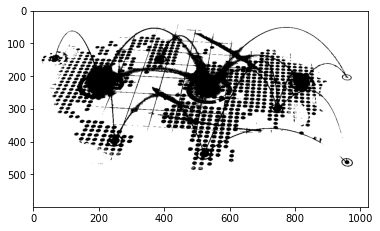

In [155]:
ret,thresh2 = cv2.threshold(nwt_img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')
print(ret)

### Threshold Truncation

127.0


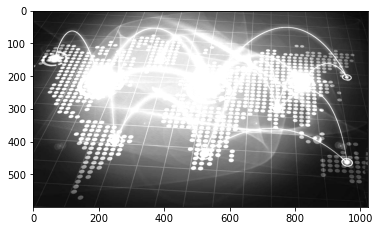

In [161]:
ret,thresh3 = cv2.threshold(nwt_img,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')
print(ret)

### Threshold to Zero

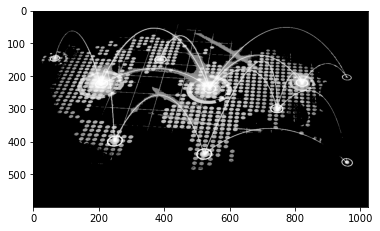

In [162]:
ret,thresh4 = cv2.threshold(nwt_img,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh4,cmap='gray')

### Threshold to Zero (Inverse)

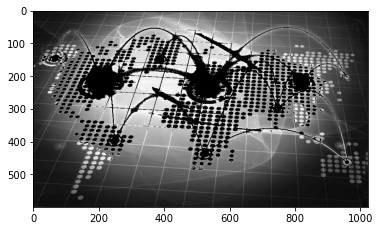

In [163]:
ret,thresh5 = cv2.threshold(nwt_img,127,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')

## Blurring and Smoothening

In [170]:
def load_img():
    img = cv2.imread('dali.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

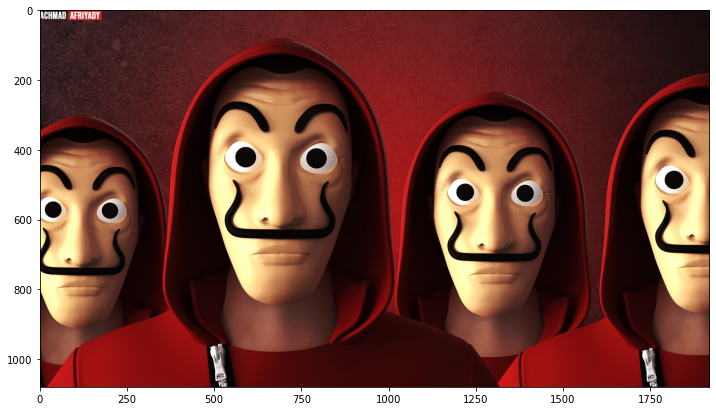

In [182]:
img_1 = load_img()
display_img(img_1)

## Gamma Correction - Brightness

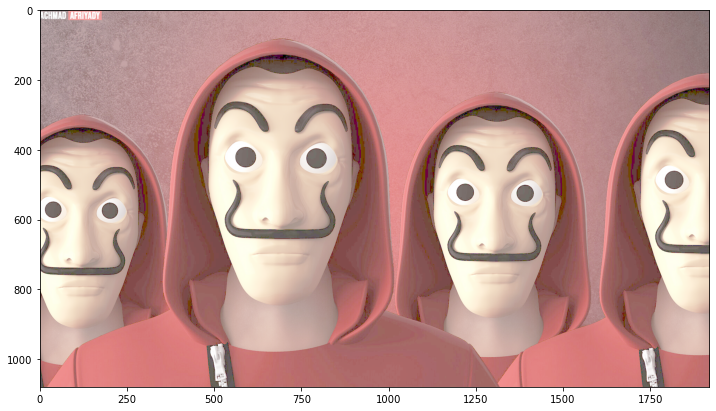

In [172]:
gamma = 1/4
effected_image = np.power(img_1, gamma)
display_img(effected_image)

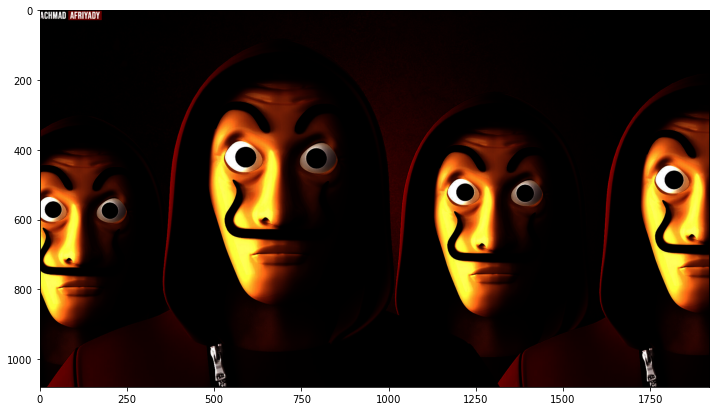

In [174]:
gamma = 4
effected_image = np.power(img_1, gamma)
display_img(effected_image)

### Low Pass Filter with a 2D Convolution
A fitlering operation known as 2D convolution can be used to create a low-pass filter. Make sure to view the video for an explanation of what's happening in the code below.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


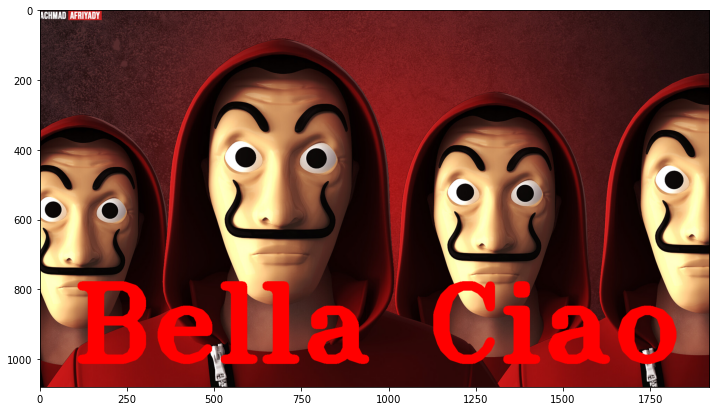

In [207]:
img_1 = load_img()
font = cv2.FONT_HERSHEY_TRIPLEX
cv2.putText(img_1,text='Bella Ciao',org=(100,1000), fontFace=font,fontScale= 10,color=(255,0,0),thickness=25)
display_img(img_1)

### Create Kernel

In [209]:
kernel = np.ones(shape=(5,5),dtype=np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


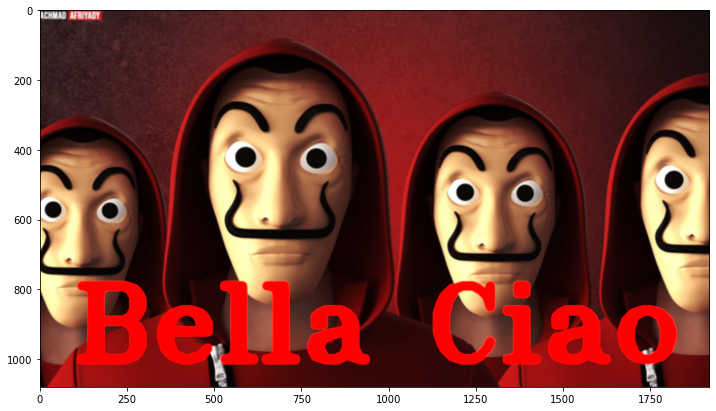

In [211]:
dst = cv2.filter2D(img_1,-1,kernel)
display_img(dst)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


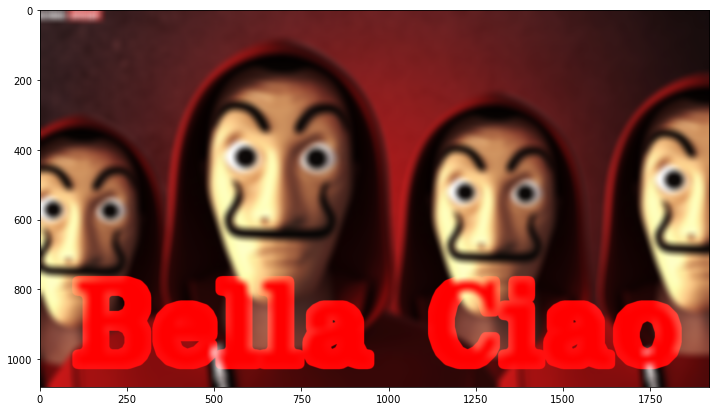

In [217]:
blurred_img = cv2.GaussianBlur(img_1,(31,31),10) #ksize Gaussian kernel size. ksize.width and ksize.height can differ but they 
display_img(blurred_img)                        #both must bepositive and odd. Or, they can be zero's and
                                                #then they are computed from sigma.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


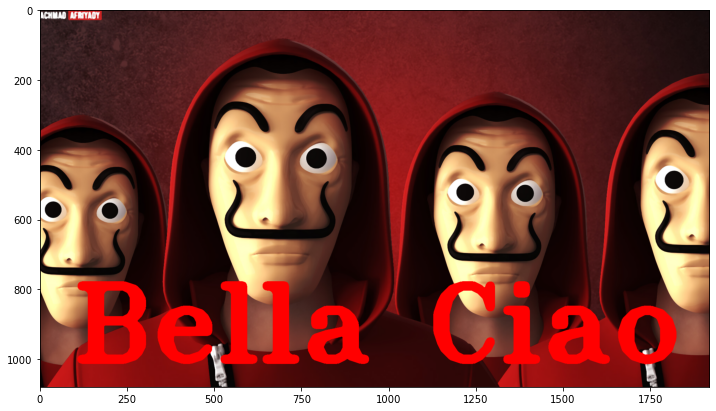

In [224]:
img_1 = load_img()
font = cv2.FONT_HERSHEY_TRIPLEX
cv2.putText(img_1,text='Bella Ciao',org=(100,1000), fontFace=font,fontScale= 10,color=(255,0,0),thickness=25)
median = cv2.medianBlur(img_1,5)
display_img(median)